# Random numbers

## Objectives

* Understand the limitations of random number generators
* Know how to seed and use a random number generator

## Intro: Grading

* Make sure you read the comments!
* JiTT comments should be usually available before class starts
* Week 1 homework has been graded
    - Week 3 homework due date pushed back to end of day today

### Week 1 homework
* Non-runnable code
    - I edited the notebook, -2 penalty
    - Make sure you leave all code syntactically valid
* Dot in filename: Please don't do this
* Docstring: Many of you forgot (I will only require something that specific if I specifically request it in the problem)
* Return values: A function should "return" whatever it is asked to produce
* Some confusion about lists vs. length of lists

## A word about Magics

## Project plans

Friday is project selection day! We'll go over the possible projects then. You'll have a little time to think about it before selecting one. **Please send me or post on Blackboard your project selection ideas!**

We'll be discussing setting up project files (instead of just using notebooks) on that day too, probably.

## Cheat sheets

Posted on Blackboard.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initial words

Most of what we'll be covering is "random numbers" for data science, not cryptography.

In [2]:
def lin_cong(c, a, M, r_i):
    return (a * r_i + c) % M

In [3]:
lin_cong(c=1, a=4, M=9, r_i=3)

4

In [4]:
lin_cong(c=1, a=4, M=9, r_i=4)

8

In [5]:
def iterator():
    yield 1
    yield 2
    yield 3

In [6]:
for item in iterator():
    print(item)

1
2
3


In [7]:
tuple(iterator())

(1, 2, 3)

In [8]:
def lin_cong_iter(c, a, M, r_0):
    r_i = r_0

    while True:
        yield r_i
        r_i = lin_cong(c, a, M, r_i)
        if r_i == r_0:
            return

In [9]:
list(lin_cong_iter(1, 4, 9, 3))

[3, 4, 8, 6, 7, 2, 0, 1, 5]

In [10]:
list(i / 8 for i in lin_cong_iter(1, 4, 9, 3))

[0.375, 0.5, 1.0, 0.75, 0.875, 0.25, 0.0, 0.125, 0.625]

Try it out:

Set `a=57, c=1, M=256, r_0=10` (like in the book) and see what happens.

In [11]:
vals = list(lin_cong_iter(a=57, c=1, M=256, r_0=10))
print(len(vals))

256


In [12]:
real_rand = np.random.randint(0, 256, 256)

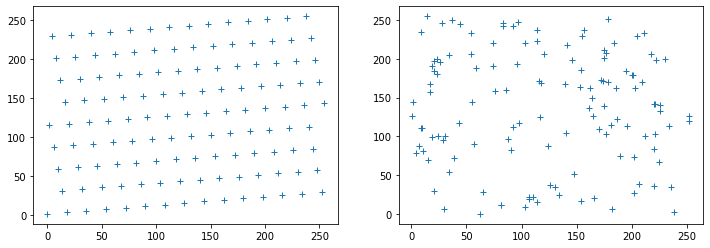

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(vals[::2], vals[1::2], "+")
axs[1].plot(real_rand[::2], real_rand[1::2], "+")
plt.show()

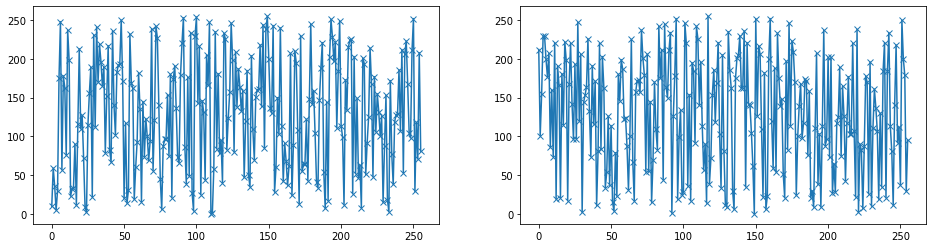

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(16, 4))
axs[0].plot(range(256), vals, "x-")
axs[1].plot(range(256), real_rand, "x-")
plt.show()

## Python random numbers

Since the book mentions Python's random numbers, let's look at that first. Once you know how they work, it really doesn't matter which library you use except for speed and simplicity (and then go with Numpy, of course).

In [15]:
import random

In [16]:
random.seed(42)

In [17]:
for i in range(10):
    print(random.randint(0, 256))

57
12
140
125
114
71
52
44
216
16


## Numpy random numbers

Let's try the same with Numpy:

In [18]:
np.random.seed(42)

In [19]:
np.random.randint(0, 256, 10)

array([102, 179,  92,  14, 106,  71, 188,  20, 102, 121])

In [20]:
state1 = np.random.RandomState(42)

In [21]:
state1.randint(0, 256)

102

In [22]:
np.random.seed(42)
rsamp = np.random.rand(1000)

In [23]:
rsamp[:100]

array([0.37454012, 0.95071431, 0.73199394, 0.59865848, 0.15601864,
       0.15599452, 0.05808361, 0.86617615, 0.60111501, 0.70807258,
       0.02058449, 0.96990985, 0.83244264, 0.21233911, 0.18182497,
       0.18340451, 0.30424224, 0.52475643, 0.43194502, 0.29122914,
       0.61185289, 0.13949386, 0.29214465, 0.36636184, 0.45606998,
       0.78517596, 0.19967378, 0.51423444, 0.59241457, 0.04645041,
       0.60754485, 0.17052412, 0.06505159, 0.94888554, 0.96563203,
       0.80839735, 0.30461377, 0.09767211, 0.68423303, 0.44015249,
       0.12203823, 0.49517691, 0.03438852, 0.9093204 , 0.25877998,
       0.66252228, 0.31171108, 0.52006802, 0.54671028, 0.18485446,
       0.96958463, 0.77513282, 0.93949894, 0.89482735, 0.59789998,
       0.92187424, 0.0884925 , 0.19598286, 0.04522729, 0.32533033,
       0.38867729, 0.27134903, 0.82873751, 0.35675333, 0.28093451,
       0.54269608, 0.14092422, 0.80219698, 0.07455064, 0.98688694,
       0.77224477, 0.19871568, 0.00552212, 0.81546143, 0.70685

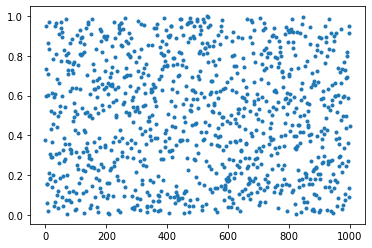

In [24]:
plt.plot(rsamp, ".")

In [25]:
N = len(rsamp)
moment1 = 1 / N * np.sum(rsamp ** 1)
moment2 = 1 / N * np.sum(rsamp ** 2)
moment3 = 1 / N * np.sum(rsamp ** 3)
print(f"moment 1: {moment1} == {1/(1+1)} +/- {1/np.sqrt(N)}")
print(f"moment 2: {moment2} == {1/(1+2)} +/- {1/np.sqrt(N)}")
print(f"moment 3: {moment3} == {1/(1+3)} +/- {1/np.sqrt(N)}")

moment 1: 0.4902565533201336 == 0.5 +/- 0.03162277660168379
moment 2: 0.32561038208072784 == 0.3333333333333333 +/- 0.03162277660168379
moment 3: 0.24419564872034066 == 0.25 +/- 0.03162277660168379


In [26]:
np.roll(np.arange(10), -2)

array([2, 3, 4, 5, 6, 7, 8, 9, 0, 1])

In [27]:
1 / N * np.sum(rsamp * np.roll(rsamp, 1))

0.24342288997134198

In [28]:
1 / N * np.sum(rsamp * np.roll(rsamp, 2))

0.23859331190762423

In [29]:
1 / N * np.sum(rsamp * np.roll(rsamp, 3))

0.23911773041052464

In [30]:
1 / N * np.sum(rsamp * np.roll(rsamp, 4))

0.24079646978602764

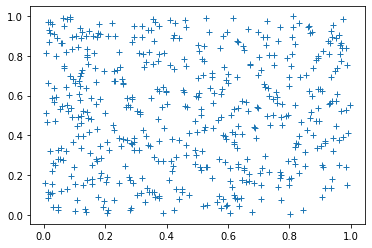

In [31]:
fig, ax = plt.subplots()
ax.plot(rsamp[::2], rsamp[1::2], "+")
plt.show()